**Aalto University**

**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

 Zeynep Erdoğan, Adam Ilyas

# Model Selection for Multiclass Classification

## Table of Contents

[1. Introduction](#Q0): 

[2. Data Analysis](#Q1):

[3. Methods and Experiments](#Q2): 

 [3.1. Using Extracted Features](#Q21):
 
  [3.1.1. Logistic Regression with cross validation ](#Q211):

  [3.1.2. Support Vector Machine with Grid Search Cross Validation](#Q212):

  [3.1.3. K-Nearest Neighbours with a good K value](#Q213):

 [3.2. Using raw data (without feature extraction)](#Q22):

  [3.2.1 Logistic Regression with cross validation](#Q221):

  [3.2.2 Support Vector Machine with Grid Search Cross Validation](#Q222):

  [3.2.3 K-Nearest Neighbours with a good K value](#Q223):


[4. Results](#Q3):

[5. Discussion/Conclusions](#Q4):

[6. References](#Q5):


## 1. Introduction
<a id="Q0"></a>


*Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.($*$)*

In this data analysis project, our aim is to find the genre of a given song by using machine learning algorithms. Basically, we will find a map function for each music genre which takes quantities of a song and maps the song to a probability that the song belongs to a spesific genre(ex 'pop rock') or not. We will train our functions with the given train dataset. 

The train dataset consist data points, each data point corresponds to a song. Data points characterized by features and labels. The features are the quantities of songs that can be measured easily such as rhythm patterns. Each label corresponds to the most representative genre.   

In this data analysis project, finding what is the label of a song is multiclass classification which is the problem of classifying instances into one of three or more classes($*$). To solve multi-class classification problems there are several algorithms based on neural networks, decision trees, k-nearest neighbors, naive Bayes, support vector machines and Extreme Learning Machines($*$). We will use couple of this algorithms and see which ones works better and why.

This can be used by music streaming services to recommend their users to songs of their liking. In example, a music streaming service can analyse the data of a user's playlist, find the genres user listens the most and recommend the same kind of genres to user. Also, this recommendation can be improved by adding other factors such as analysis of the lyrics, singer choices, users ages, users mood etc.






## 2. Data analysis
<a id="Q1"></a>

We are given two datasets, training dataset and test dataset. In the training dataset, there are 4363 songs. Each of these songs have 264 features.The first 168 feature values are for the rhythm patterns. The next 48 feature values are for the chroma which is a representation of the audio spectrum. The last 48 feature values are for the MFCCs which provide a spectrum of the spectrum of an audio file. Every song given in the training dataset belongs to a spesific class of a music genre and we are given 10 labels. There are 2178 Pop Rock songs, 618 Electronic songs, 326 rap songs, 253 jazz songs, 214 latin songs, 260 RnB songs, 141 International songs, 195 Country songs, 92 Reggae songs, 86 Blues songs in the training data. 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats

In [5]:
# Load the data and cleanup
train_labels = pd.read_csv("train_labels.csv", header=None)
print(train_labels.shape) 
train_data = pd.read_csv("train_data.csv", header=None)
print(train_data.shape)
train_data.head(5)

(4363, 1)
(4363, 264)


,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.216490,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,...,0.100670,0.14739,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.9,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.2,...,0.126760,0.36321,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.9,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.4,...,0.096479,0.28950,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.6,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.7,...,0.138340,0.38266,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813


[2178, 618, 326, 253, 214, 260, 141, 195, 92, 86]


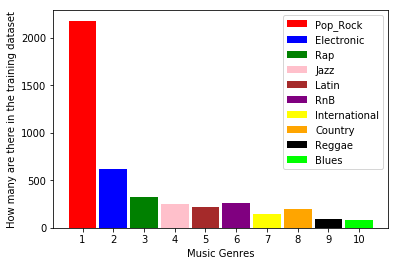

In [6]:
#Analysis of the input data
labels=train_labels.values
y=[(np.where(labels[:,0]==i+1))[0].size for i in range(10)]
print(y)
y_pos = np.arange(1,11)
legend = ['Pop_Rock','Electronic','Rap','Jazz','Latin','RnB','International','Country','Reggae','Blues']
colors=["r", "b", "g","pink","brown","purple","yellow","orange","black","lime"]
for i in range(10):
  plt.bar(y_pos[i], y[i],width=0.9, color=colors[i],label=legend[i])
plt.xticks(y_pos)
plt.xlabel("Music Genres")
plt.ylabel("How many are there in the training dataset")
plt.legend()
plt.show()


### Feature extraction

- 1 to 168: Rhythm pattern
- 169 to 216: Chroma
- 217 to 264: MFCCs (Mel Frequency Cepstral Coefficients)

Since there are many features in our datasets, we can try to reduce those. For this, Feature extraction can be used. Feature extraction reduces the number of features by replacing them with some statistics/quantites about the data such as mean, variance ect. 

In [4]:
rhythm_feature_set = train_data.iloc[:,0:168]
chroma_feature_set = train_data.iloc[:,168:216]
mfcc_feature_set = train_data.iloc[:,216:]

features = pd.DataFrame()
features["rhythm_mean"] = rhythm_feature_set.apply(np.mean, axis=1)
features["rhythm_median"] = rhythm_feature_set.apply(np.median, axis=1)
features["rhythm_variance"] = rhythm_feature_set.apply(np.var, axis=1)

features["rhythm_kurtosis"] = rhythm_feature_set.apply(stats.kurtosis, axis=1)
features["rhythm_skewness"] = rhythm_feature_set.apply(stats.skew, axis=1)

features["rhythm_min"] = rhythm_feature_set.apply(np.min, axis=1)
features["rhythm_max"] = rhythm_feature_set.apply(np.max, axis=1)

features["chroma_mean"] = chroma_feature_set.apply(np.mean, axis=1)
features["chroma_std"] = chroma_feature_set.apply(np.std, axis=1)
features["chroma_min"] = chroma_feature_set.apply(np.min, axis=1)
features["chroma_max"] = chroma_feature_set.apply(np.max, axis=1)

features["mfcc_mean"] = mfcc_feature_set.apply(np.mean, axis=1)
features["mfcc_std"] = mfcc_feature_set.apply(np.std, axis=1)
features["mfcc_min"] = mfcc_feature_set.apply(np.min, axis=1)
features["mfcc_max"] = mfcc_feature_set.apply(np.max, axis=1)

features.head()

,rhythm_mean,rhythm_median,rhythm_variance,rhythm_kurtosis,rhythm_skewness,rhythm_min,rhythm_max,chroma_mean,chroma_std,chroma_min,chroma_max,mfcc_mean,mfcc_std,mfcc_min,mfcc_max
0,3186.884054,1520.45,1.355423e+08,149.134782,12.035399,0.016,150390.0,0.347344,0.396084,0.002,1.0,83333.576956,276385.325742,-0.19229,1000000.0
1,2721.480839,2254.05,6.356003e+06,1.394458,1.370253,0.000,11090.0,0.371001,0.399262,0.002,1.0,83333.445326,276385.365429,-0.23789,1000000.0
2,3063.031202,2144.65,9.463125e+06,1.005046,1.351375,-45.887,12707.0,0.337415,0.397231,0.002,1.0,83333.624873,276385.311295,-0.23153,1000000.0
3,3576.968470,3064.55,9.182377e+06,1.559031,1.354329,0.000,13815.0,0.358995,0.389015,0.012,1.0,83333.421559,276385.372595,-0.11490,1000000.0
4,2476.953321,1897.95,4.677566e+06,1.502884,1.231454,0.000,10880.0,0.406539,0.387381,0.033,1.0,83333.455130,276385.362473,-0.13230,1000000.0


In [5]:
# drop non unique columns

for header in features.columns:
    n_unique = features[header].nunique()
    if  n_unique < 20:
        print(header, n_unique)
        features.drop([header], axis=1, inplace=True)
        
# we can drop these

chroma_max 1
mfcc_max 1


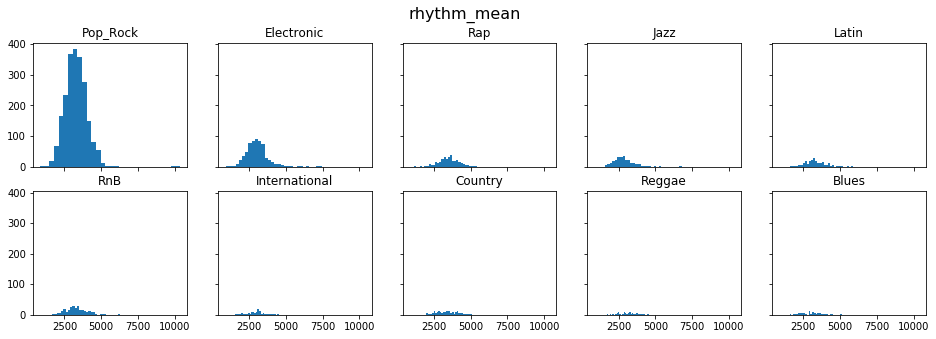

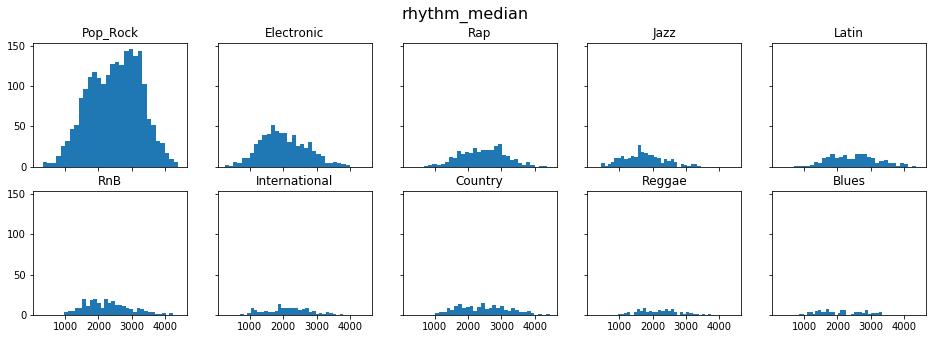

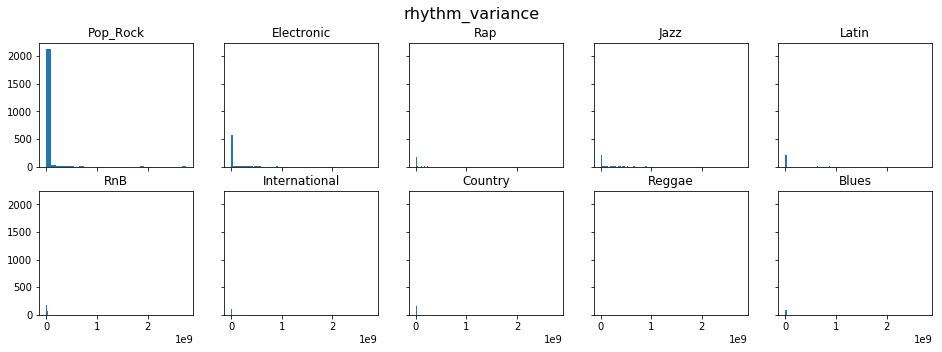

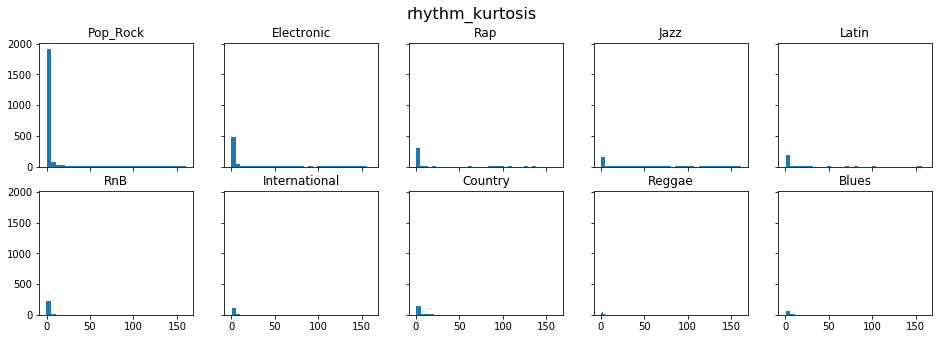

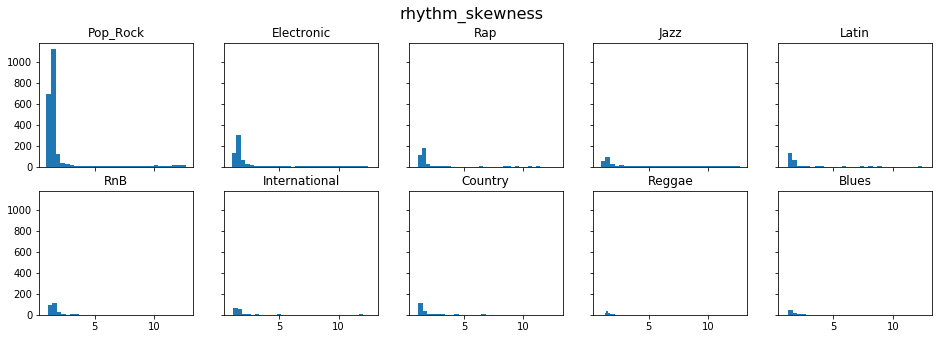

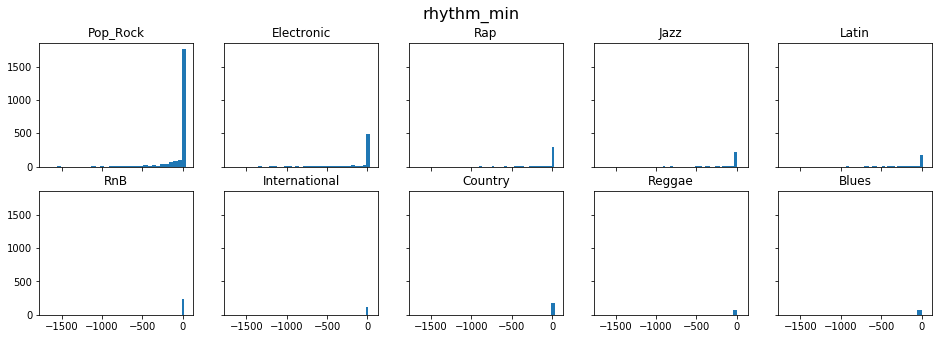

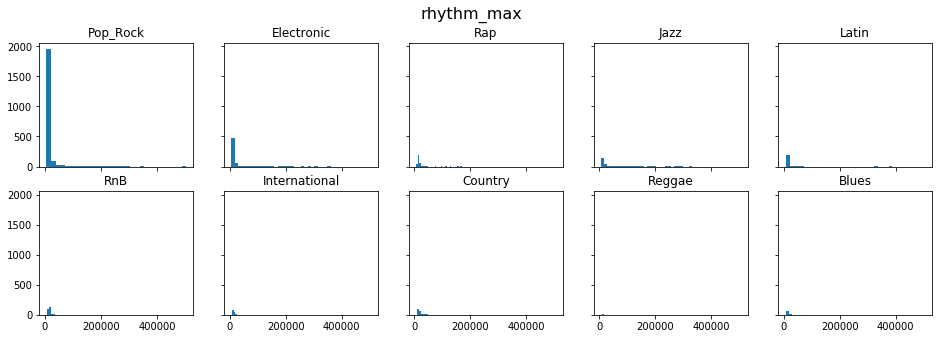

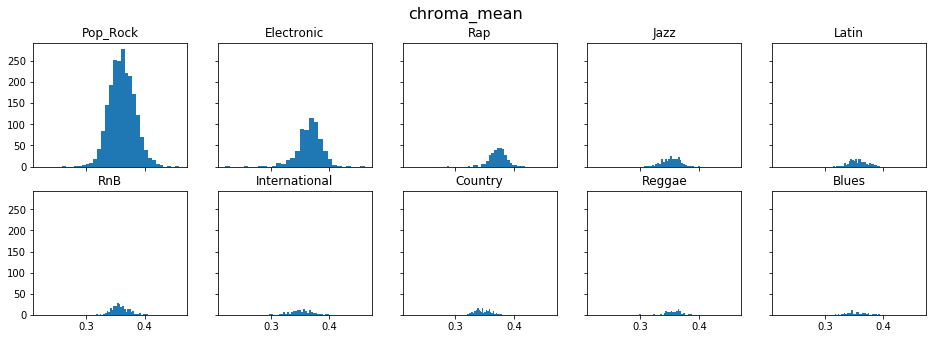

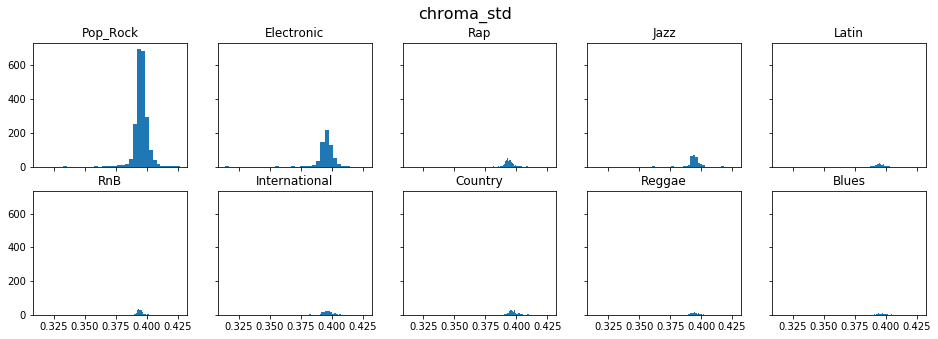

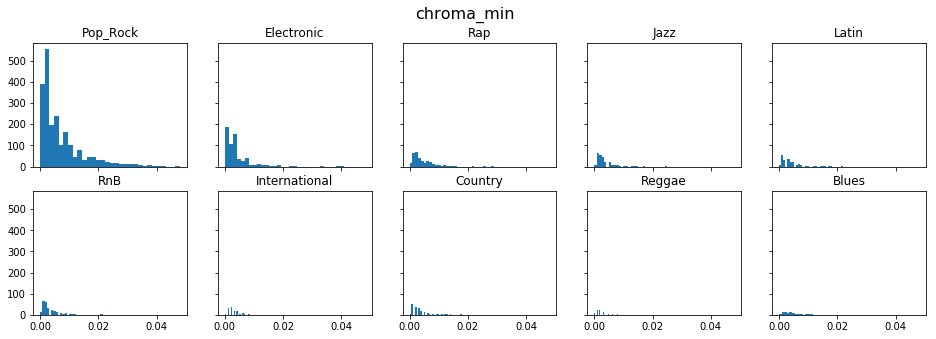

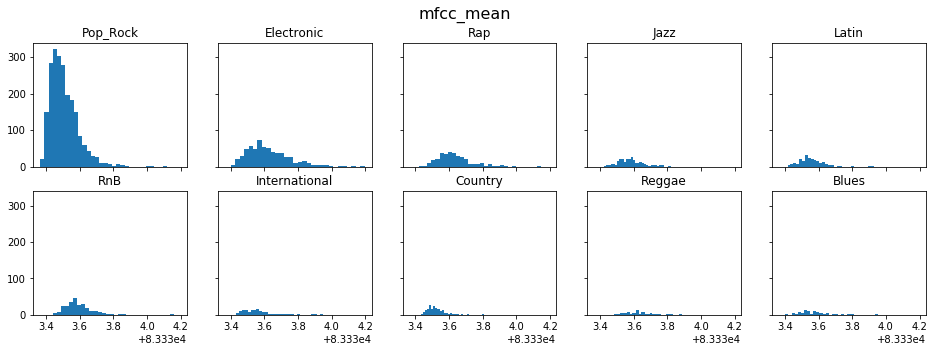

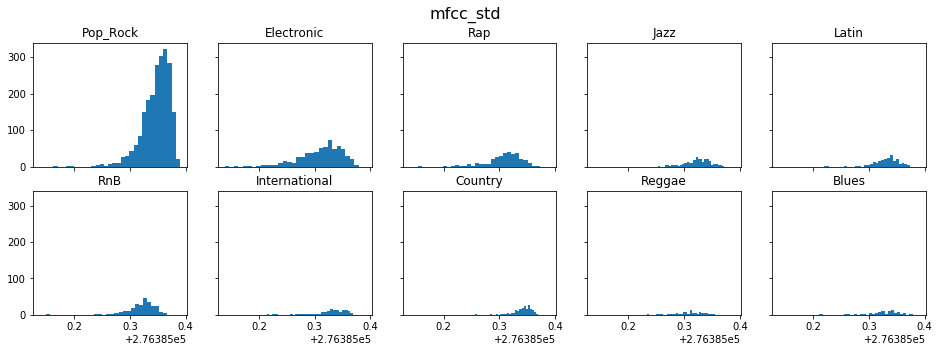

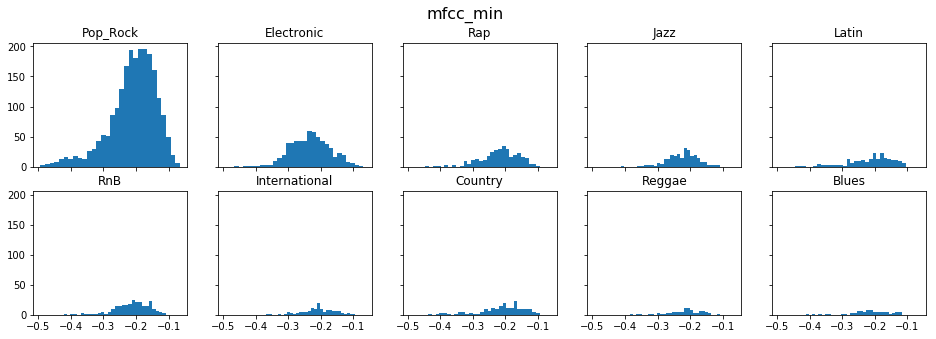

In [6]:
explore = features.copy()
explore["labels"] = train_labels[0]

genre = ['Pop_Rock','Electronic','Rap','Jazz','Latin','RnB','International','Country','Reggae','Blues']

for feature in explore.columns:
    if feature == 'labels':
        continue

    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,5), sharex=True, sharey=True)

    plt.suptitle(feature, fontsize=16)
    for i in range(10):
        plot = axes[int(i/5)][i%5]
        plot.hist(explore[explore['labels']==i+1][feature], bins=30)
        plot.set_title(genre[i])

    plt.show()

## 3. Methods and experiments
<a id="Q2"></a>

  Since we have many features, it can complicate our classification methods, this is also known as the Curse of dimensionality. As the dimensionality increases, the classifier’s performance increases until the optimal number of features is reached. Further increasing the dimensionality without increasing the number of training samples results in a decrease in classifier performance ($*$). We will see if our feature extraction method which is calculating mean, median, variance, kurtosis, skewness, min, max of certain feature blocks which are rhythm patterns, chromas and  MFCCs is going to result better than using raw data.

  

Multiclass Classification Methods we choose:
#####  Logistic Regression with Cross Validation 
Logistic regression uses feature space(set of all possible features), binary label space(if a song is 'rock' or not ) and a linear predictor. For measuring the quality of the linear predictor it uses logistic loss.

Although it only finds if a song belongs to one genre or not, by splitting our problem into 10 subproblems(one for each class/music genre), each subproblem being a binary classification problem we can use logistic regression for multiclass classification. This technique is called one vs all.

Learning the parameters of a prediction function and testing it on the same data is a mistake because the model would fail to predict anything useful on yet-unseen data.($*$) So we need to split our traing data but this way we might waste same chunks of it. We can use Cross Validation to overcome this issue. What Cross validation does is it divides data to n parts. For each part, it uses other parts as traing data and itself as test data. This way we get n estimations of the model, then we can calculate an efficient result from these estimations.
 
##### Support Vector Machine with Grid Search Cross Validation: 
In machine learning, support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier($*$)

Althought SVC is used for binary classification, by using one vs one tecnique we can use this for our problem. One vs one tecnique done by choosing two pairs of classes and a binary classification(in this case SVC) for every possiblity of choosing two classes.

#####  K-Nearest Neighbours

What K-Nearest Neighbours Algorithm does is:

- Load the training and test data 
- Choose the value of K 
- For each point in test data:
   - find the Euclidean distance to all training data points
   - store the Euclidean distances in a list and sort it 
   - choose the first k points 
   - assign a class to the test point based on the majority of ($*$)

We can choose a k-value by iteratively trying values then choosing the most effienct one. 

Since K-Nearest Neighbours can be applied to a multiclass classification problem directly(without any techniques such as one vs all), it is a good idea to use for our problem.




In [7]:
# Trials with ML algorithms
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## 3.1. Using extracted features
<a id="Q21"></a>

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

### 3.1.1. Logistic Regression with Cross Validation
<a id="Q211"></a>

In [9]:
# scale
norm_features = preprocessing.scale(features)
X_train, X_test, y_train, y_test = train_test_split(norm_features, train_labels[0], test_size=0.33)

#LogisticRegressionCV already uses Cross Validation method and one vs all technique.
log_cv_model = LogisticRegressionCV(solver='lbfgs', max_iter=10**6, cv=5) 
log_cv_model.fit(X_train,y_train)
log_cv_pred = log_cv_model.predict(X_test)
log_cv_pred_proba = log_cv_model.predict_proba(X_test)

In [10]:
log_cv_accuracy = accuracy_score(y_true=y_test, y_pred=log_cv_pred)
print(log_cv_accuracy)
log_cv_log_loss = log_loss(y_true=y_test, y_pred=log_cv_pred_proba)
print(log_cv_log_loss)

0.53125
1.5782229474992744


### 3.1.2. Support Vector Machine with Grid Search Cross Validation
<a id="Q212"></a>

In [11]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2, n_jobs=50)
grid.fit(X_train,y_train)
grid_svc_pred = grid.predict(X_test)
grid_svc_pred_proba = grid.predict_proba(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=1, gamma=1 ....................................................
[CV] C=1, gamma=1 ....................................................
[CV] C=1, gamma=1 ....................................................
[CV] C=1, gamma=0.1 ..................................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=0.1, gamm

[Parallel(n_jobs=50)]: Done  24 out of  48 | elapsed:   14.8s remaining:   14.8s


[CV] ................................. C=10, gamma=0.01, total=  14.0s
[CV] ................................. C=10, gamma=0.01, total=  14.4s
[CV] ................................. C=10, gamma=0.01, total=  14.5s
[CV] ................................... C=0.1, gamma=1, total=  16.1s
[CV] ................................... C=0.1, gamma=1, total=  16.1s
[CV] ................................... C=0.1, gamma=1, total=  16.4s
[CV] ............................... C=100, gamma=0.001, total=  16.4s
[CV] ............................... C=100, gamma=0.001, total=  16.6s
[CV] ..................................... C=1, gamma=1, total=  17.0s
[CV] ................................. C=100, gamma=0.1, total=  17.1s
[CV] ................................ C=100, gamma=0.01, total=  17.3s
[CV] ..................................... C=1, gamma=1, total=  17.4s
[CV] ............................... C=100, gamma=0.001, total=  17.2s
[CV] ..................................... C=1, gamma=1, total=  17.6s
[CV] .

[Parallel(n_jobs=50)]: Done  48 out of  48 | elapsed:   18.9s finished


In [12]:
grid_svc_accuracy = accuracy_score(y_true=y_test, y_pred=grid_svc_pred)
print(grid_svc_accuracy)
grid_svc_log_loss = log_loss(y_true=y_test, y_pred=grid_svc_pred_proba)
print(grid_svc_log_loss)

0.5493055555555556
1.474851659334813


### 3.1.3. K-Nearest Neighbours with a good K value
<a id="Q213"></a>

Max accuracy = 0.55 when k = 37
Min log loss = 2.5886278113310977 when k = 37


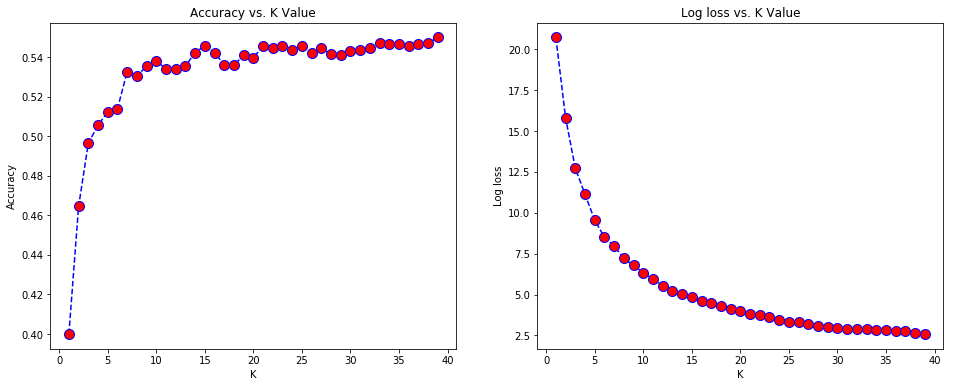

In [15]:
accuracy_list = []
log_loss_list = []

# Will take some time
# Trying diffent values for k.
for i in range(1,40):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    proba_i = knn.predict_proba(X_test)

    accuracy_list.append(np.mean(pred_i == y_test))
    log_loss_list.append(log_loss(y_true=y_test, y_pred=proba_i))
    
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16,6))

axes[0].plot(range(1,40),accuracy_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy vs. K Value')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Accuracy')

axes[1].plot(range(1,40),log_loss_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
axes[1].set_title('Log loss vs. K Value')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Log loss')

best_knn_accuracy = max(accuracy_list)
smallest_knn_log_loss = min(log_loss_list)
print(f'Max accuracy = {best_knn_accuracy} when k = {accuracy_list.index(best_knn_accuracy)-1}')
print(f'Min log loss = {smallest_knn_log_loss} when k = {log_loss_list.index(smallest_knn_log_loss)-1}')

## 3.2. Using raw data (without feature extraction)
<a id="Q22"></a>

In [16]:
# Load the data and cleanup
train_labels = pd.read_csv("train_labels.csv", header=None)
train_data = pd.read_csv("train_data.csv", header=None)
scaled_features = preprocessing.scale(train_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, train_labels[0], test_size=0.33)

### 3.2.1. Logistic Regression with Cross Validation
<a id="Q221"></a>

In [17]:
# Logistic regression with CV
log_cv_model_raw = LogisticRegressionCV(solver='lbfgs', max_iter=10**6, cv=5)
log_cv_model_raw.fit(X_train,y_train)
log_cv_pred_raw = log_cv_model_raw.predict(X_test)
log_cv_pred_proba_raw = log_cv_model_raw.predict_proba(X_test)

log_cv_accuracy_raw = accuracy_score(y_true=y_test, y_pred=log_cv_pred_raw)
log_cv_log_loss_raw = log_loss(y_true=y_test, y_pred=log_cv_pred_proba_raw)

### 3.2.2.  Support Vector Machine with Grid Search Cross Validation
<a id="Q222"></a>

In [18]:
# support vector machibe
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid_raw = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2, n_jobs=50)
grid_raw.fit(X_train,y_train)
grid_svc_pred_raw = grid_raw.predict(X_test)
grid_svc_pred_proba_raw = grid_raw.predict_proba(X_test)

grid_svc_accuracy_raw = accuracy_score(y_true=y_test, y_pred=grid_svc_pred_raw)
grid_svc_log_loss_raw = log_loss(y_true=y_test, y_pred=grid_svc_pred_proba_raw)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=1, gamma=1 ....................................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=1, gamma=

[Parallel(n_jobs=50)]: Done  24 out of  48 | elapsed:  3.4min remaining:  3.4min


[CV] ................................. C=0.1, gamma=0.1, total= 3.9min
[CV] .................................. C=10, gamma=0.1, total= 3.9min
[CV] ................................. C=0.1, gamma=0.1, total= 3.9min
[CV] ................................... C=0.1, gamma=1, total= 3.9min
[CV] ................................... C=0.1, gamma=1, total= 3.9min
[CV] ................................. C=100, gamma=0.1, total= 3.9min
[CV] ................................. C=0.1, gamma=0.1, total= 3.9min
[CV] .................................. C=10, gamma=0.1, total= 3.9min
[CV] ................................... C=1, gamma=0.1, total= 3.9min
[CV] .................................... C=10, gamma=1, total= 3.9min
[CV] .................................... C=10, gamma=1, total= 3.9min
[CV] ................................. C=100, gamma=0.1, total= 3.9min
[CV] .................................... C=10, gamma=1, total= 3.9min
[CV] ..................................... C=1, gamma=1, total= 3.9min
[CV] .

[Parallel(n_jobs=50)]: Done  48 out of  48 | elapsed:  4.0min finished


### 3.2.3. K-Nearest Neighbours with a good K value
<a id="Q223"></a>

In [19]:
accuracy_raw = []
log_loss_list_raw = []

# Will take some time
for i in range(1,40):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    proba_i = knn.predict_proba(X_test)

    accuracy_raw.append(np.mean(pred_i == y_test))
    log_loss_list_raw.append(log_loss(y_true=y_test, y_pred=proba_i))
    
best_knn_accuracy_raw = max(accuracy_raw)
smallest_knn_log_loss_raw = min(log_loss_list_raw)

## 4. Results
<a id="Q3"></a>

Text(0.5,1,'Raw Data')

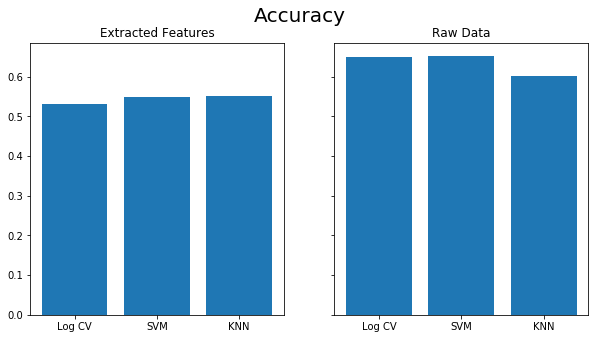

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)

plt.suptitle("Accuracy", size=20)

axes[0].bar(['Log CV','SVM','KNN'], [log_cv_accuracy,grid_svc_accuracy,best_knn_accuracy])
axes[0].set_title("Extracted Features")

axes[1].bar(['Log CV','SVM','KNN'], [log_cv_accuracy_raw,grid_svc_accuracy_raw,best_knn_accuracy_raw])
axes[1].set_title("Raw Data")

Text(0.5,1,'Raw Data')

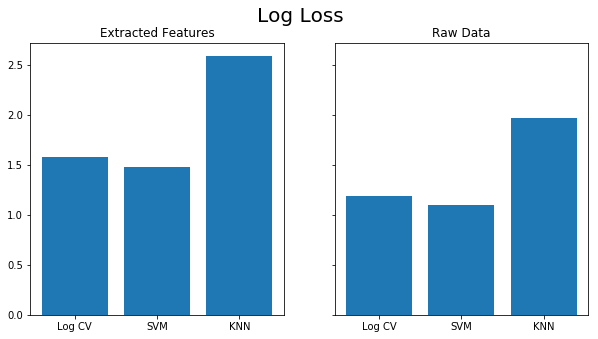

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)

plt.suptitle("Log Loss", size=20)

axes[0].bar(['Log CV','SVM','KNN'], [log_cv_log_loss ,grid_svc_log_loss, smallest_knn_log_loss])
axes[0].set_title("Extracted Features")

axes[1].bar(['Log CV','SVM','KNN'], [log_cv_log_loss_raw ,grid_svc_log_loss_raw, smallest_knn_log_loss_raw])
axes[1].set_title("Raw Data")

In [27]:
# train SVM with FULL DATA SET
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
svcModel = GridSearchCV(SVC(probability=False),param_grid,refit=True,verbose=2, n_jobs=50)
svcModel.fit(scaled_features, train_labels[0])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=1, gamma=1 ....................................................
[CV] C=1, gamma=

[Parallel(n_jobs=50)]: Done  24 out of  48 | elapsed:  1.7min remaining:  1.7min


[CV] ................................. C=0.1, gamma=0.1, total= 1.5min
[CV] ................................. C=0.1, gamma=0.1, total= 1.5min
[CV] ................................... C=1, gamma=0.1, total= 1.5min
[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] ................................... C=0.1, gamma=1, total= 1.5min
[CV] ................................. C=0.1, gamma=0.1, total= 1.6min
[CV] ..................................... C=1, gamma=1, total= 1.6min
[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] ..................................... C=1, gamma=1, total= 1.6min
[CV] ................................... C=1, gamma=0.1, total= 1.6min
[CV] ................................... C=1, gamma=0.1, total= 1.6min
[CV] .................................. C=10, gamma=0.1, total= 1.6min
[CV] ................................... C=100, gamma=1, total= 1.6min
[CV] .................................. C=10, gamma=0.1, total= 1.6min
[CV] .

[Parallel(n_jobs=50)]: Done  48 out of  48 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=50,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [31]:
test_data = pd.read_csv("./data/test_data.csv", header=None)
scaled_test_data = preprocessing.scale(test_data)

svmPred = svcModel.predict(scaled_test_data)
template = pd.read_csv("./data/dummy_solution_accuracy.csv")

submission = template.copy()
submission["Sample_label"] = svmPred
submission.head()

,Sample_id,Sample_label
0,1,3
1,2,9
2,3,1
3,4,1
4,5,1


In [32]:
submission.to_csv("./submission/svm_final_without_p.csv", index=False)

In [ ]:
# train SVM with FULL DATA SET
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
svcModel_p = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2, n_jobs=50)
svcModel_p.fit(scaled_features, train_labels[0])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=1 ..................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.1 ................................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=0.1, gamma=0.001 ..............................................
[CV] C=1, gamma=1 ....................................................
[CV] C=1, gamma=

In [ ]:
svmPred_p = svcModel_p.predict(scaled_test_data)
template = pd.read_csv("./data/dummy_solution_accuracy.csv")

submission_p = template.copy()
submission_p["Sample_label"] = svmPred_p
submission_p.head()

## 5. Discussion/Conclusions
<a id="Q4"></a>

First of all, when comparing using extracted features and using raw data, as clearly seen in the results using raw data performs better. This might be due to our extraction method, we are losing a lot of information. Our feature counts drops to 15 from 264. 

In the feature researches, instead of using feature extraction, one can try to use feature selection. We can drop insignificant features and keep important ones.

Secondly, both in log loss and accuracy, K-Nearest Neighbours algortihm performed the worst. This might be because the curse of dimensionality($*$) effects KNN the most. Since there are many dimensions for distance function to calculate, all points become equidistant.

Both in Kaggle and here SVM performs the best for both log loss and accuracy.

Accuracy is the count of predictions where your predicted value equals the actual value. Accuracy is not always a good indicator because of its yes or no nature. Log Loss takes into account the uncertainty of your prediction based on how much it varies from the actual label. This gives us a more nuanced view into the performance of our model. ($*$)


## 6. References
<a id="Q5"></a>

*What is Machine Learning?* https://www.expertsystem.com/machine-learning-definition/

*Multiclass classification* https://en.wikipedia.org/wiki/Multiclass_classification

*The Curse of Dimensionality in classification* http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

*Cross Validation* http://scikit-learn.org/stable/modules/cross_validation.html

*Support Vector Machine* https://en.wikipedia.org/wiki/Support_vector_machine

*K Nearest Neighbours* https://towardsdatascience.com/k-nearest-neighbours-introduction-to-machine-learning-algorithms-18e7ce3d802a

*Log Loss* http://wiki.fast.ai/index.php/Log_Loss

*scikit-learn* http://scikit-learn.org/stable/